### Testing the package River 

In [7]:
import river
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Create some data

In [8]:
def test_func(x, a, b):
    return a*np.sin(np.pi*x) + b*2*x + np.random.normal(scale=0.02, size=x.size)

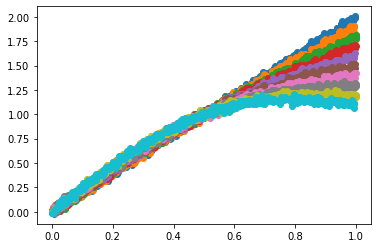

In [195]:
a = np.arange(0,0.5,0.05,)
fig = plt.figure()
X = np.array([])
Y = np.array([])
for i in a:
    x = np.random.uniform(size=500)
    y = test_func(x, i, 1-i)
    plt.scatter(x,y)
    X = np.append(X, x)
    Y = np.append(Y, y)

np.savetxt("Work-Related/stream_data.csv", np.c_[X, Y], delimiter=",", header="x,y", comments="")

In [196]:
df = pd.read_csv("Work-Related/stream_data.csv")
df.head()

,x,y
0,0.407330,0.821488
1,0.780647,1.547576
2,0.431872,0.856447
3,0.583599,1.173854
4,0.990976,1.975307


---
### Test River

In [197]:
from river import compose
from river import linear_model
from river import preprocessing
from river import stream
from river import metrics
from river import evaluate
from river import tree
from river import neighbors
from river import ensemble

In [210]:
model = compose.Pipeline(
    preprocessing.StandardScaler(),
    #linear_model.LinearRegression(l2=1e-4,)
    #linear_model.PARegressor()
    #tree.HoeffdingTreeRegressor(grace_period=100, max_depth=15)
    #neighbors.KNNRegressor(window_size=200, n_neighbors=5)
    ensemble.BaggingRegressor(tree.HoeffdingAdaptiveTreeRegressor())
)
metric = metrics.RMSE()

In [211]:
X_y = stream.iter_csv("Work-Related/stream_data.csv", 
                     converters={"x": float, "y": float}, target="y")

In [212]:
evaluate.progressive_val_score(X_y, model, metric, print_every=100)

[100] RMSE: 0.545497
[200] RMSE: 0.387434
[300] RMSE: 0.316923
[400] RMSE: 0.274833
[500] RMSE: 0.246027
[600] RMSE: 0.225739
[700] RMSE: 0.215434
[800] RMSE: 0.20368
[900] RMSE: 0.192159
[1,000] RMSE: 0.182482
[1,100] RMSE: 0.174693
[1,200] RMSE: 0.167538
[1,300] RMSE: 0.161064
[1,400] RMSE: 0.155312
[1,500] RMSE: 0.150146
[1,600] RMSE: 0.145582
[1,700] RMSE: 0.14134
[1,800] RMSE: 0.137434
[1,900] RMSE: 0.133847
[2,000] RMSE: 0.130537
[2,100] RMSE: 0.127593
[2,200] RMSE: 0.124786
[2,300] RMSE: 0.122169
[2,400] RMSE: 0.11967
[2,500] RMSE: 0.117339
[2,600] RMSE: 0.115321
[2,700] RMSE: 0.113271
[2,800] RMSE: 0.111324
[2,900] RMSE: 0.109492
[3,000] RMSE: 0.107802
[3,100] RMSE: 0.106518
[3,200] RMSE: 0.105191
[3,300] RMSE: 0.10378
[3,400] RMSE: 0.102456
[3,500] RMSE: 0.101126
[3,600] RMSE: 0.100002
[3,700] RMSE: 0.098837
[3,800] RMSE: 0.097608
[3,900] RMSE: 0.09645
[4,000] RMSE: 0.095304
[4,100] RMSE: 0.094325
[4,200] RMSE: 0.093327
[4,300] RMSE: 0.09233
[4,400] RMSE: 0.091413
[4,500] RMSE

RMSE: 0.087043

In [213]:
x_plot = np.linspace(0,1,100)
y_plot_true = test_func(x_plot, 0.5, 0.5)

In [214]:
y_plot = []
for xp in x_plot:
    y_plot.append(model.predict_one(x={"x":xp}))

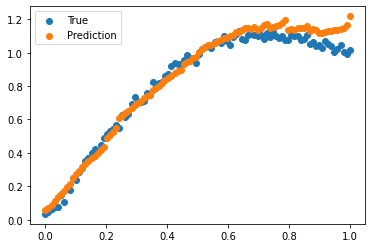

In [215]:
df = pd.read_csv("Work-Related/stream_data.csv")
fig = plt.figure()
plt.scatter(x_plot, y_plot_true, label="True")
plt.scatter(x_plot, y_plot, label="Prediction")
#plt.scatter(df["x"], df["y"])
plt.legend()